In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import matplotlib.pyplot as plt

In [2]:
def str2ary(str_):
    x = str_.replace("]","").replace("[","")
    x = x.split(",")
    assert(not len(x)%2)
    lst = []
    for i in range(0, len(x), 2):
        tmp  = tuple([int(x[i]), int(x[i+1])])
        lst.append(tmp)
    print(lst)
x = "[[2149, 2349], [4536, 4844], [3539, 3779]]"
str2ary(x)

[(2149, 2349), (4536, 4844), (3539, 3779)]


In [3]:
pwd

'/Users/juanrodriguez/PycharmProjects/pythonProject1/Seq2SeqAnom'

In [4]:
labels = os.path.join( "data","labeled_anomalies.csv")
lbls = pd.read_csv(labels)
lbls.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


In [5]:
test_lbls =dict()
for i in lbls.iterrows():
    test_lbls[i[1]['chan_id']] =  i[1]['anomaly_sequences']

In [6]:
x = [*range(10)]
len(x[0:12])

10

In [7]:
glb = glob.glob(os.path.join("data","train","*"))

In [8]:
glb.sort()
glb

['data/train/A-1.npy',
 'data/train/A-2.npy',
 'data/train/A-3.npy',
 'data/train/A-4.npy',
 'data/train/A-5.npy',
 'data/train/A-6.npy',
 'data/train/A-7.npy',
 'data/train/A-8.npy',
 'data/train/A-9.npy',
 'data/train/B-1.npy',
 'data/train/C-1.npy',
 'data/train/C-2.npy',
 'data/train/D-1.npy',
 'data/train/D-11.npy',
 'data/train/D-12.npy',
 'data/train/D-13.npy',
 'data/train/D-14.npy',
 'data/train/D-15.npy',
 'data/train/D-16.npy',
 'data/train/D-2.npy',
 'data/train/D-3.npy',
 'data/train/D-4.npy',
 'data/train/D-5.npy',
 'data/train/D-6.npy',
 'data/train/D-7.npy',
 'data/train/D-8.npy',
 'data/train/D-9.npy',
 'data/train/E-1.npy',
 'data/train/E-10.npy',
 'data/train/E-11.npy',
 'data/train/E-12.npy',
 'data/train/E-13.npy',
 'data/train/E-2.npy',
 'data/train/E-3.npy',
 'data/train/E-4.npy',
 'data/train/E-5.npy',
 'data/train/E-6.npy',
 'data/train/E-7.npy',
 'data/train/E-8.npy',
 'data/train/E-9.npy',
 'data/train/F-1.npy',
 'data/train/F-2.npy',
 'data/train/F-3.npy',
 

In [9]:
channels = []
trn_data  = []
for g in glb:
    channels.append(g.split("/")[-1])
    trn_data.append(np.load(g))


In [10]:
trn_data = np.array(trn_data, dtype=object)

In [11]:
trn_data

array([array([[0.999, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
              [0.999, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
              [0.999, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
              ...,
              [0.999, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
              [0.999, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
              [0.999, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]]),
       array([[ 0.02458936,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              [ 0.02458936,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              [ 0.02458936,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              ...,
              [-0.65529155,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
              [-0.65529155,  0.        ,  0.        , ...,  0.        ,
                0.        ,  0.        ],
            

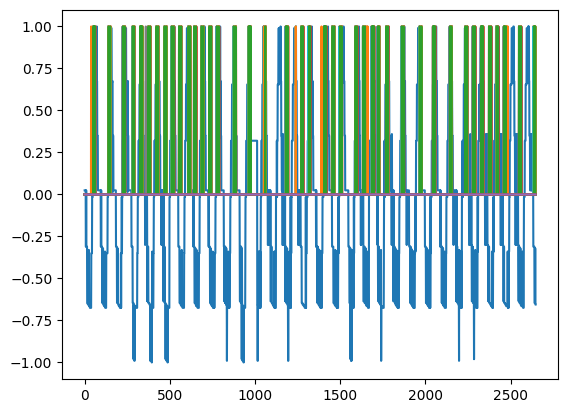

In [12]:
plt.plot(trn_data[1][0:-1])

In [13]:
import DataStore

ds = DataStore.DataStore("data", 10)

In [19]:
ds.testData['P-7'].x[0].shape

(55, 10)

In [15]:
x = np.concatenate((sample[i:i+9, :], np.zeros((9,30))), axis=1)

NameError: name 'sample' is not defined

In [ ]:
aa =np.concatenate(([sample[i+10]], np.zeros((1,30),)), axis=1)
aa

In [ ]:
X_trn = tf.constant(X_trn)
Y_trn = tf.constant(Y_trn)
X_trn.shape

In [ ]:
nb_epoch = 200
batch_size = 50
input_dim = sample.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim_1 = int(encoding_dim / 2) #
hidden_dim_2=4
learning_rate = 3e-8

In [ ]:
input_layer = tf.keras.layers.Input(shape=(input_dim, 9))
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(1, activation='tanh')(decoder)
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
print(autoencoder.summary())

In [ ]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True)
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [ ]:
history = autoencoder.fit(X_trn, Y_trn,
                    epochs=nb_epoch,
                    batch_size=10,
                    shuffle=True,
                    verbose=1,
                    ).history

In [ ]:
X_trn[0].shape

In [ ]:
x = np.array(X_trn[10])
x.shape
x = x.reshape(1,25,9)
Y_trn[10]

In [ ]:


s = autoencoder.predict(x)

In [ ]:
s- x

In [ ]:
autoencoder.predict(x)

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()